# Рабочая тетрадь 4 Разшильдяев Александр

## 1.1.1 Пример
***Задача:***</br> Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.
</br> ***Решение:***

In [1]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [2]:
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

0.9999999999999997 -0.949999999999999


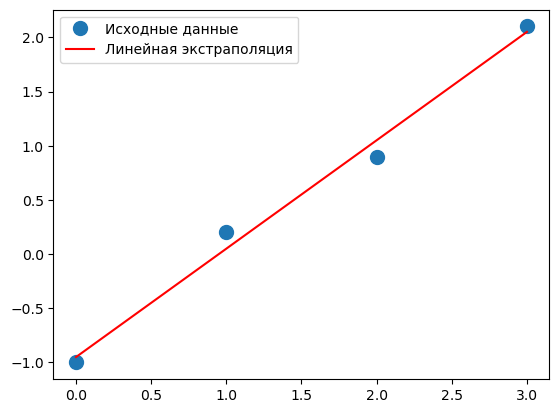

In [4]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

## 1.1.2 Пример
***Задача:***</br> 
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.
</br> ***Решение:***

In [5]:
from numpy import *
from numpy.random import *
delta = 1.0
x = linspace(-5, 5, 11)
y = x**2 + delta * (rand(11) - 0.5)
x += delta*(rand(11)-0.5)
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

In [6]:
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')
print(x)
print(y)

[-5.13247179 -3.96365515 -3.26136277 -1.58145731 -0.79187446 -0.01117859
  0.80412702  1.94176297  3.01583341  3.89868829  4.65482366]
[24.94851126 16.2260583   9.39113466  4.48480772  0.90411293 -0.07559351
  1.40048416  4.32940684  9.26501963 15.72454944 24.83965888]


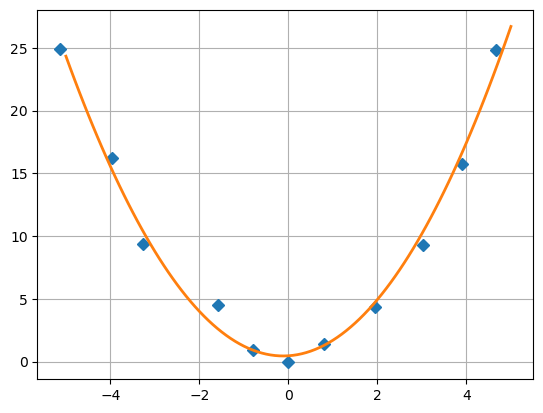

In [7]:
m = vstack((x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

## 1.1.3 Пример
***Задача:***</br> 
По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка
</br> ***Решение:***

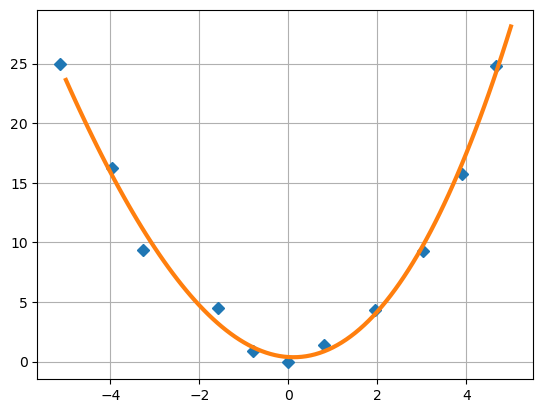

In [9]:
m = vstack((x**3, x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

## 1.1.4 Пример
***Задача:***</br> 
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 
$$
f(x, b) = b_0 + b_1 exp(-b2x^2)
$$
</br> ***Решение:***

In [14]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

In [15]:
import scipy as sp
from scipy.optimize import curve_fit
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt

array([0.25399801, 0.73930434, 0.53596834])

In [16]:
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

0.0002163904278790613
0.10796192982875724


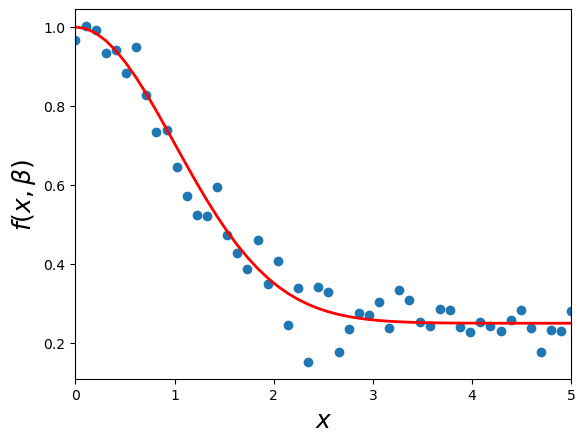

In [18]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

## 1.1.5 Пример
***Задача:***</br> 
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) $f(x, b) = b_0 + b_1x$</br>
2) $f(x, b) = b_0 + b_1x + b_2x^2$</br>
3) $f(x, b) = b_0 + b_1ln(x)$</br>
4) $f(x, b) = b_0 x^{b_1}$
</br> ***Решение:***

## Задание
***Задача:***</br> 
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных
</br> ***Решение:***

## 1.2.1 Пример
***Задача:***</br> 
Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn
</br> ***Решение:***

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:
</br> ***Решение:***

Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код:
</br> ***Решение:***

# Задание
***Задача:***</br> 
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-
regression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз
</br> ***Решение:***